In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

x_train = train.drop(columns=['label']).values / 255.0
y_train = train['label'].values
x_test = test.drop(columns=['label']).values / 255.0
y_test = test['label'].values

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

num_classes = len(np.unique(y_train))
num_classes

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(x_train, y_train, epochs=10, validation_split=.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7674 - loss: 0.6427 - val_accuracy: 0.8788 - val_loss: 0.3386
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8842 - loss: 0.3168 - val_accuracy: 0.8963 - val_loss: 0.2969
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9060 - loss: 0.2612 - val_accuracy: 0.8998 - val_loss: 0.2752
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9165 - loss: 0.2261 - val_accuracy: 0.9040 - val_loss: 0.2573
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9254 - loss: 0.2014 - val_accuracy: 0.9067 - val_loss: 0.2566
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9355 - loss: 0.1738 - val_accuracy: 0.8813 - val_loss: 0.3148
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9416 - loss: 0.1562 - val_accuracy: 0.9102 - val_loss: 0.2590
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9496 - loss: 0

In [9]:
train_loss, train_acc = model.evaluate(x_test, y_test)
print(train_loss)
print(train_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9142 - loss: 0.2691
0.26097509264945984
0.9175999760627747


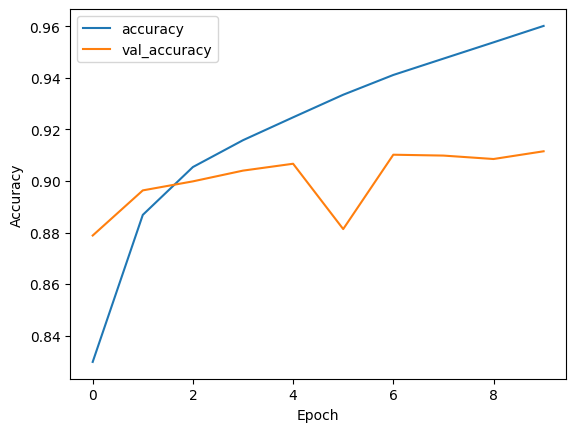

In [10]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


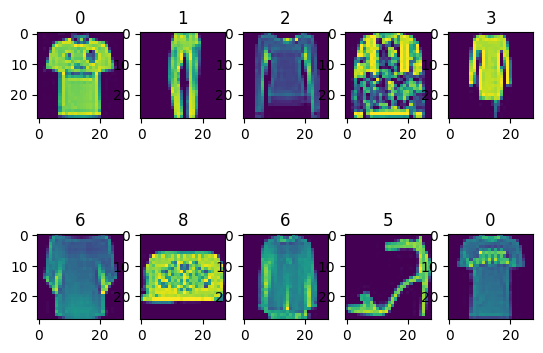

In [18]:
predictions = model.predict(x_test)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(np.argmax(predictions[i]))

In [19]:
y_actual = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.87      0.86      0.86      1000
           3       0.94      0.93      0.94      1000
           4       0.86      0.90      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.70      0.75      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

